<a href="https://colab.research.google.com/github/AayushKucheria/digital-health/blob/master/Futurice_Digital_Healthcare_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pybdf
!pip install PyWavelets

     |████████████████████████████████| 573kB 2.7MB/s 
  Created wheel for pybdf: filename=pybdf-0.2.5-cp36-cp36m-linux_x86_64.whl size=68150 sha256=8a81319cc5846e3aca005a87fa017c1cce4b91bda41298a9da759de281942965
  Stored in directory: /root/.cache/pip/wheels/3e/11/1a/8aaa602b661d882a0de1c5022578a1ebc243a6ba9061243183
Successfully built pybdf


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pandas.testing as tm
from pybdf import bdfRecording
from matplotlib import pyplot
from dateutil.parser import parse
#import statsmodels.api as sm
plt.rcParams.update({'figure.figsize': (50,15)})
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['text.color'] = 'k'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
bdfRec = bdfRecording('sub-hc1_ses-hc_task-rest_eeg.bdf')
rec = bdfRec.getData()
data = rec.get('data')
AF3 = data[1, :]#[0:10500]
AF4 = data[28, :]#[0:10500]
T7  = data[6, :]#[0:10500]
T8  = data[23, :]#[0:10500]
Pz  = data[12, :]#[0:10500]
AF3_df = pd.DataFrame(data=AF3)
AF4_df = pd.DataFrame(data=AF4)
T7_df  = pd.DataFrame(data=T7)
T8_df  = pd.DataFrame(data=T8)
Pz_df  = pd.DataFrame(data=Pz)

FileNotFoundError: ignored

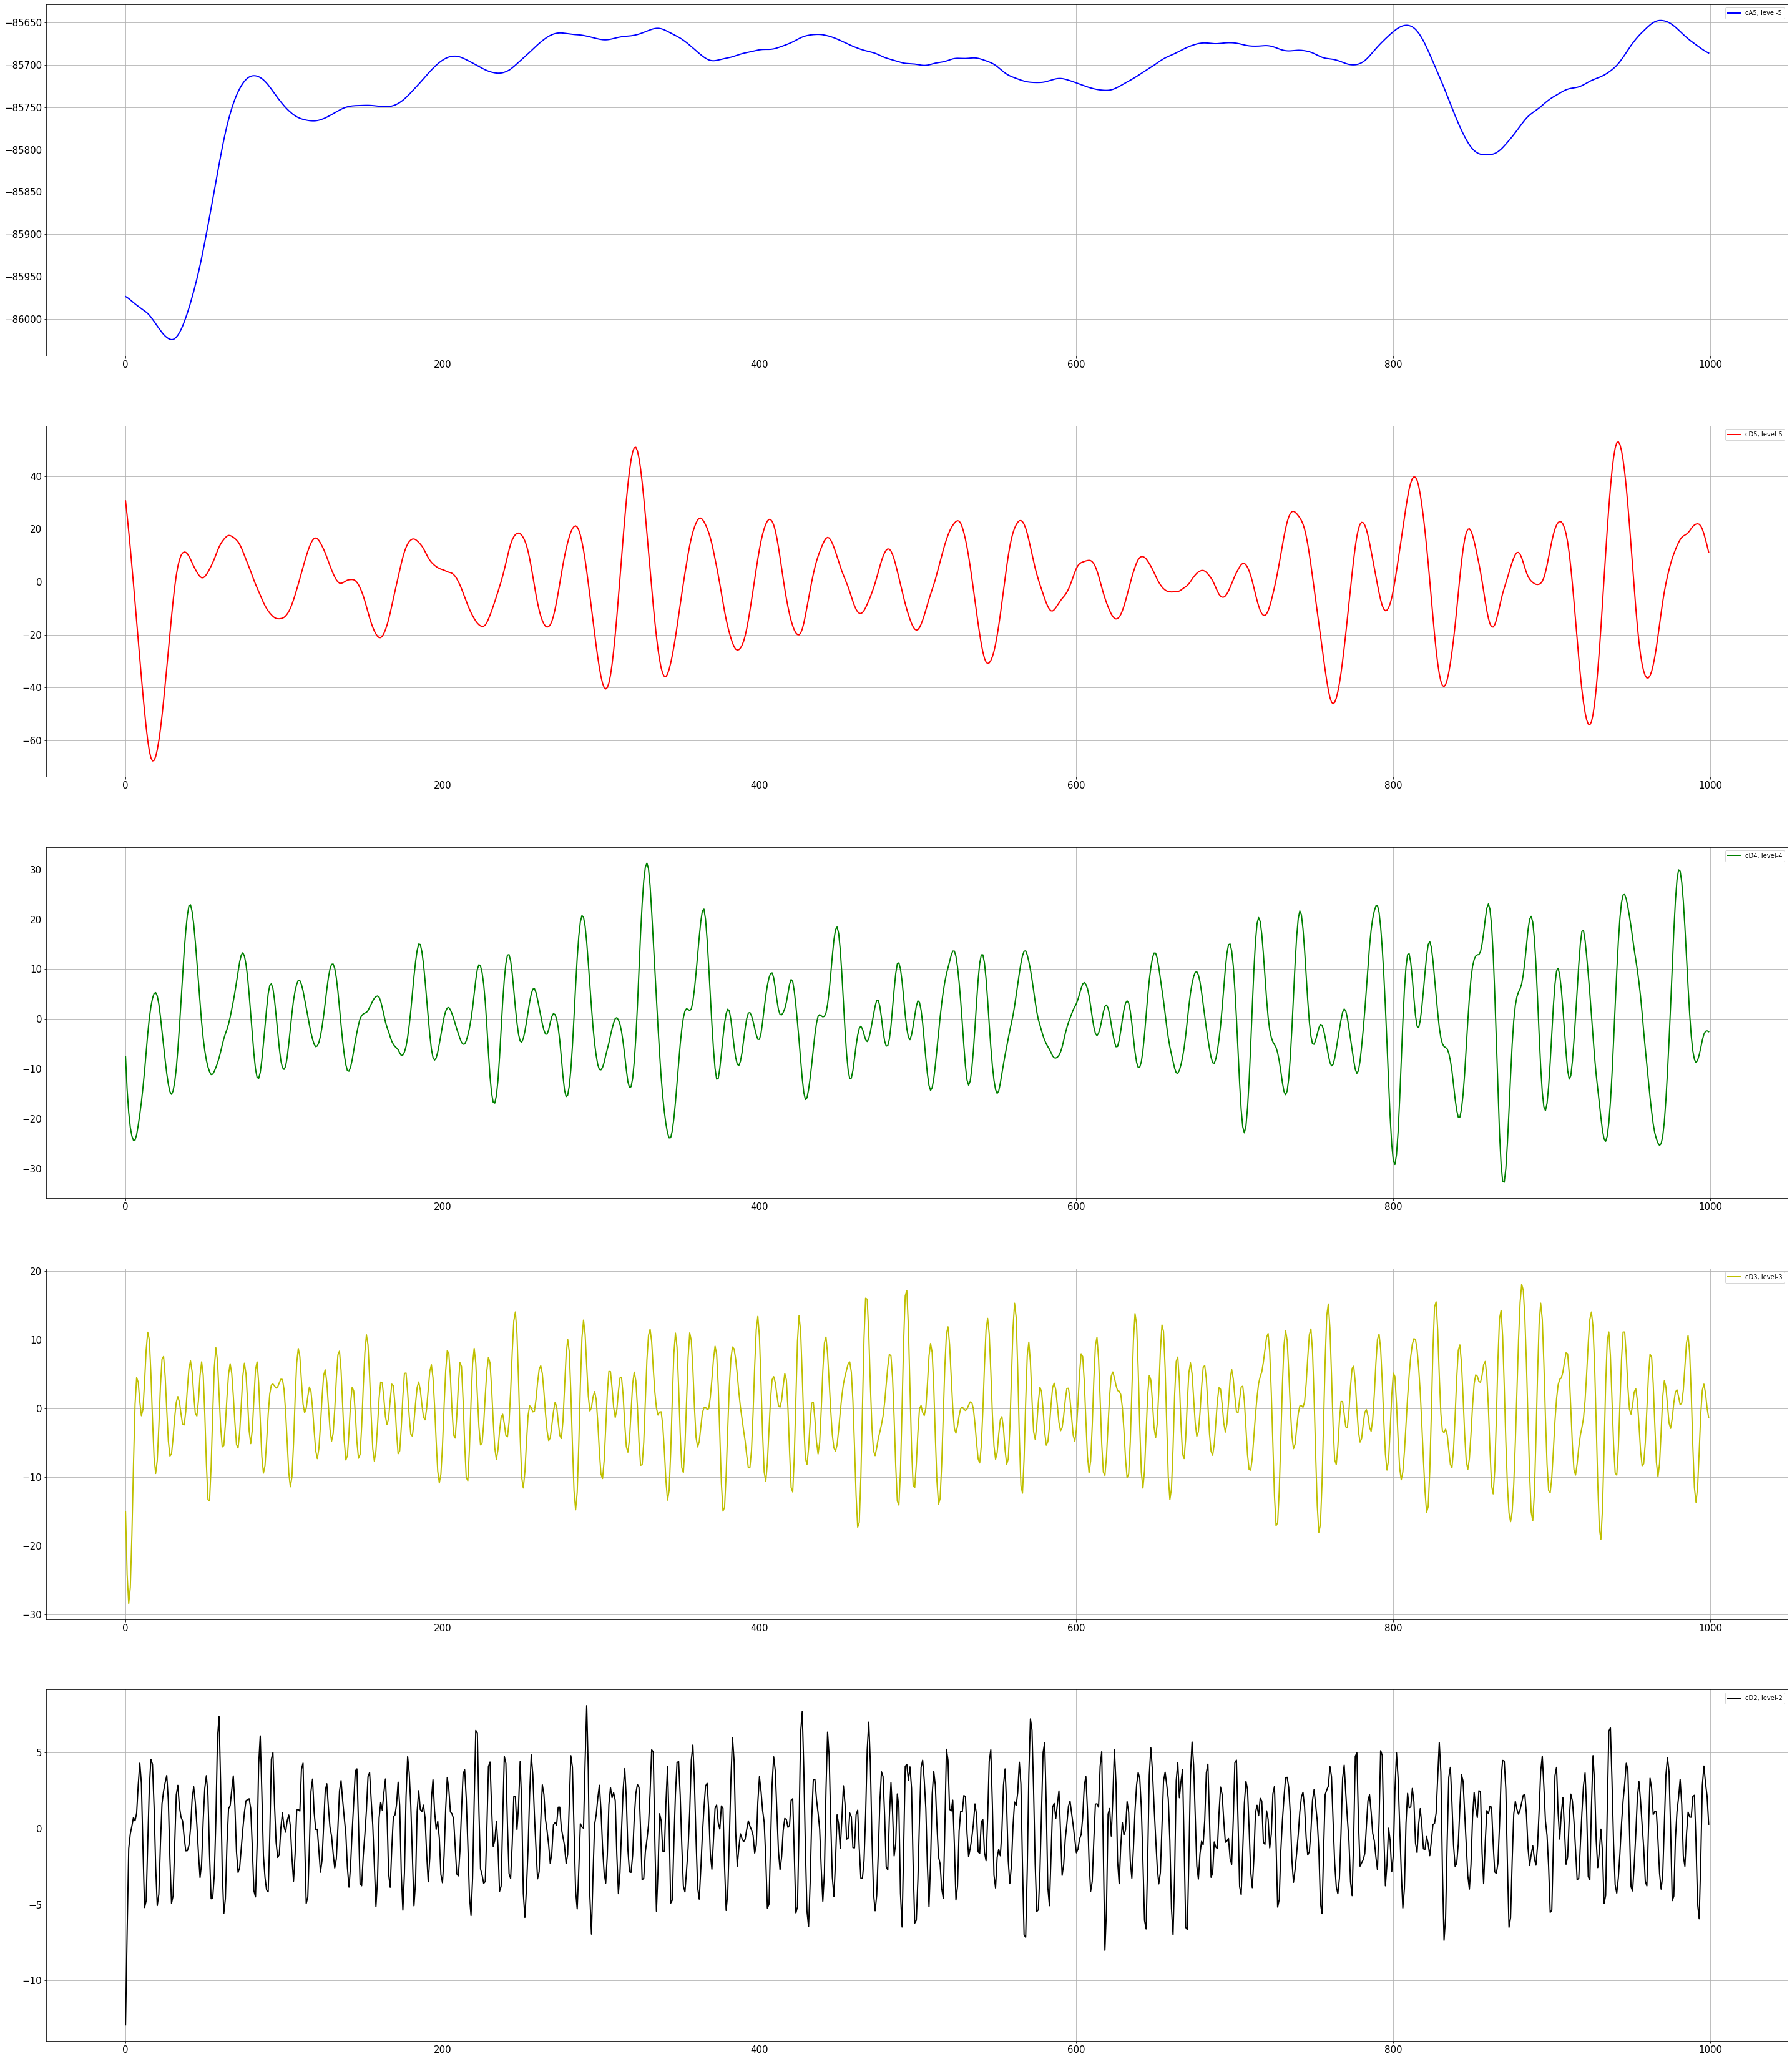

In [ ]:
import pywt
coeffs = pywt.swt(Pz, 'db4', level=5)
[(cA5, cD5), (cA4, cD4), (cA3,cD3), (cA2, cD2), (cA1, cD1)] = coeffs
cd = [cA5, cD5,cD4, cD3, cD2, cD1]
colorE = ['b','r','g','y','k','m']
labeled = ['cA5, level-5','cD5, level-5','cD4, level-4', 'cD3, level-3','cD2, level-2', 'cD1, level-1']
fig, ax = plt.subplots(5, 1, figsize=(50, 60))
for i in range(5):
    for j in range(1):
       ax[i].plot(cd[i][0:1000], colorE[i] ,linewidth = 2, label = labeled[i])
       ax[i].grid ()
       ax[i].legend (loc = 'best')

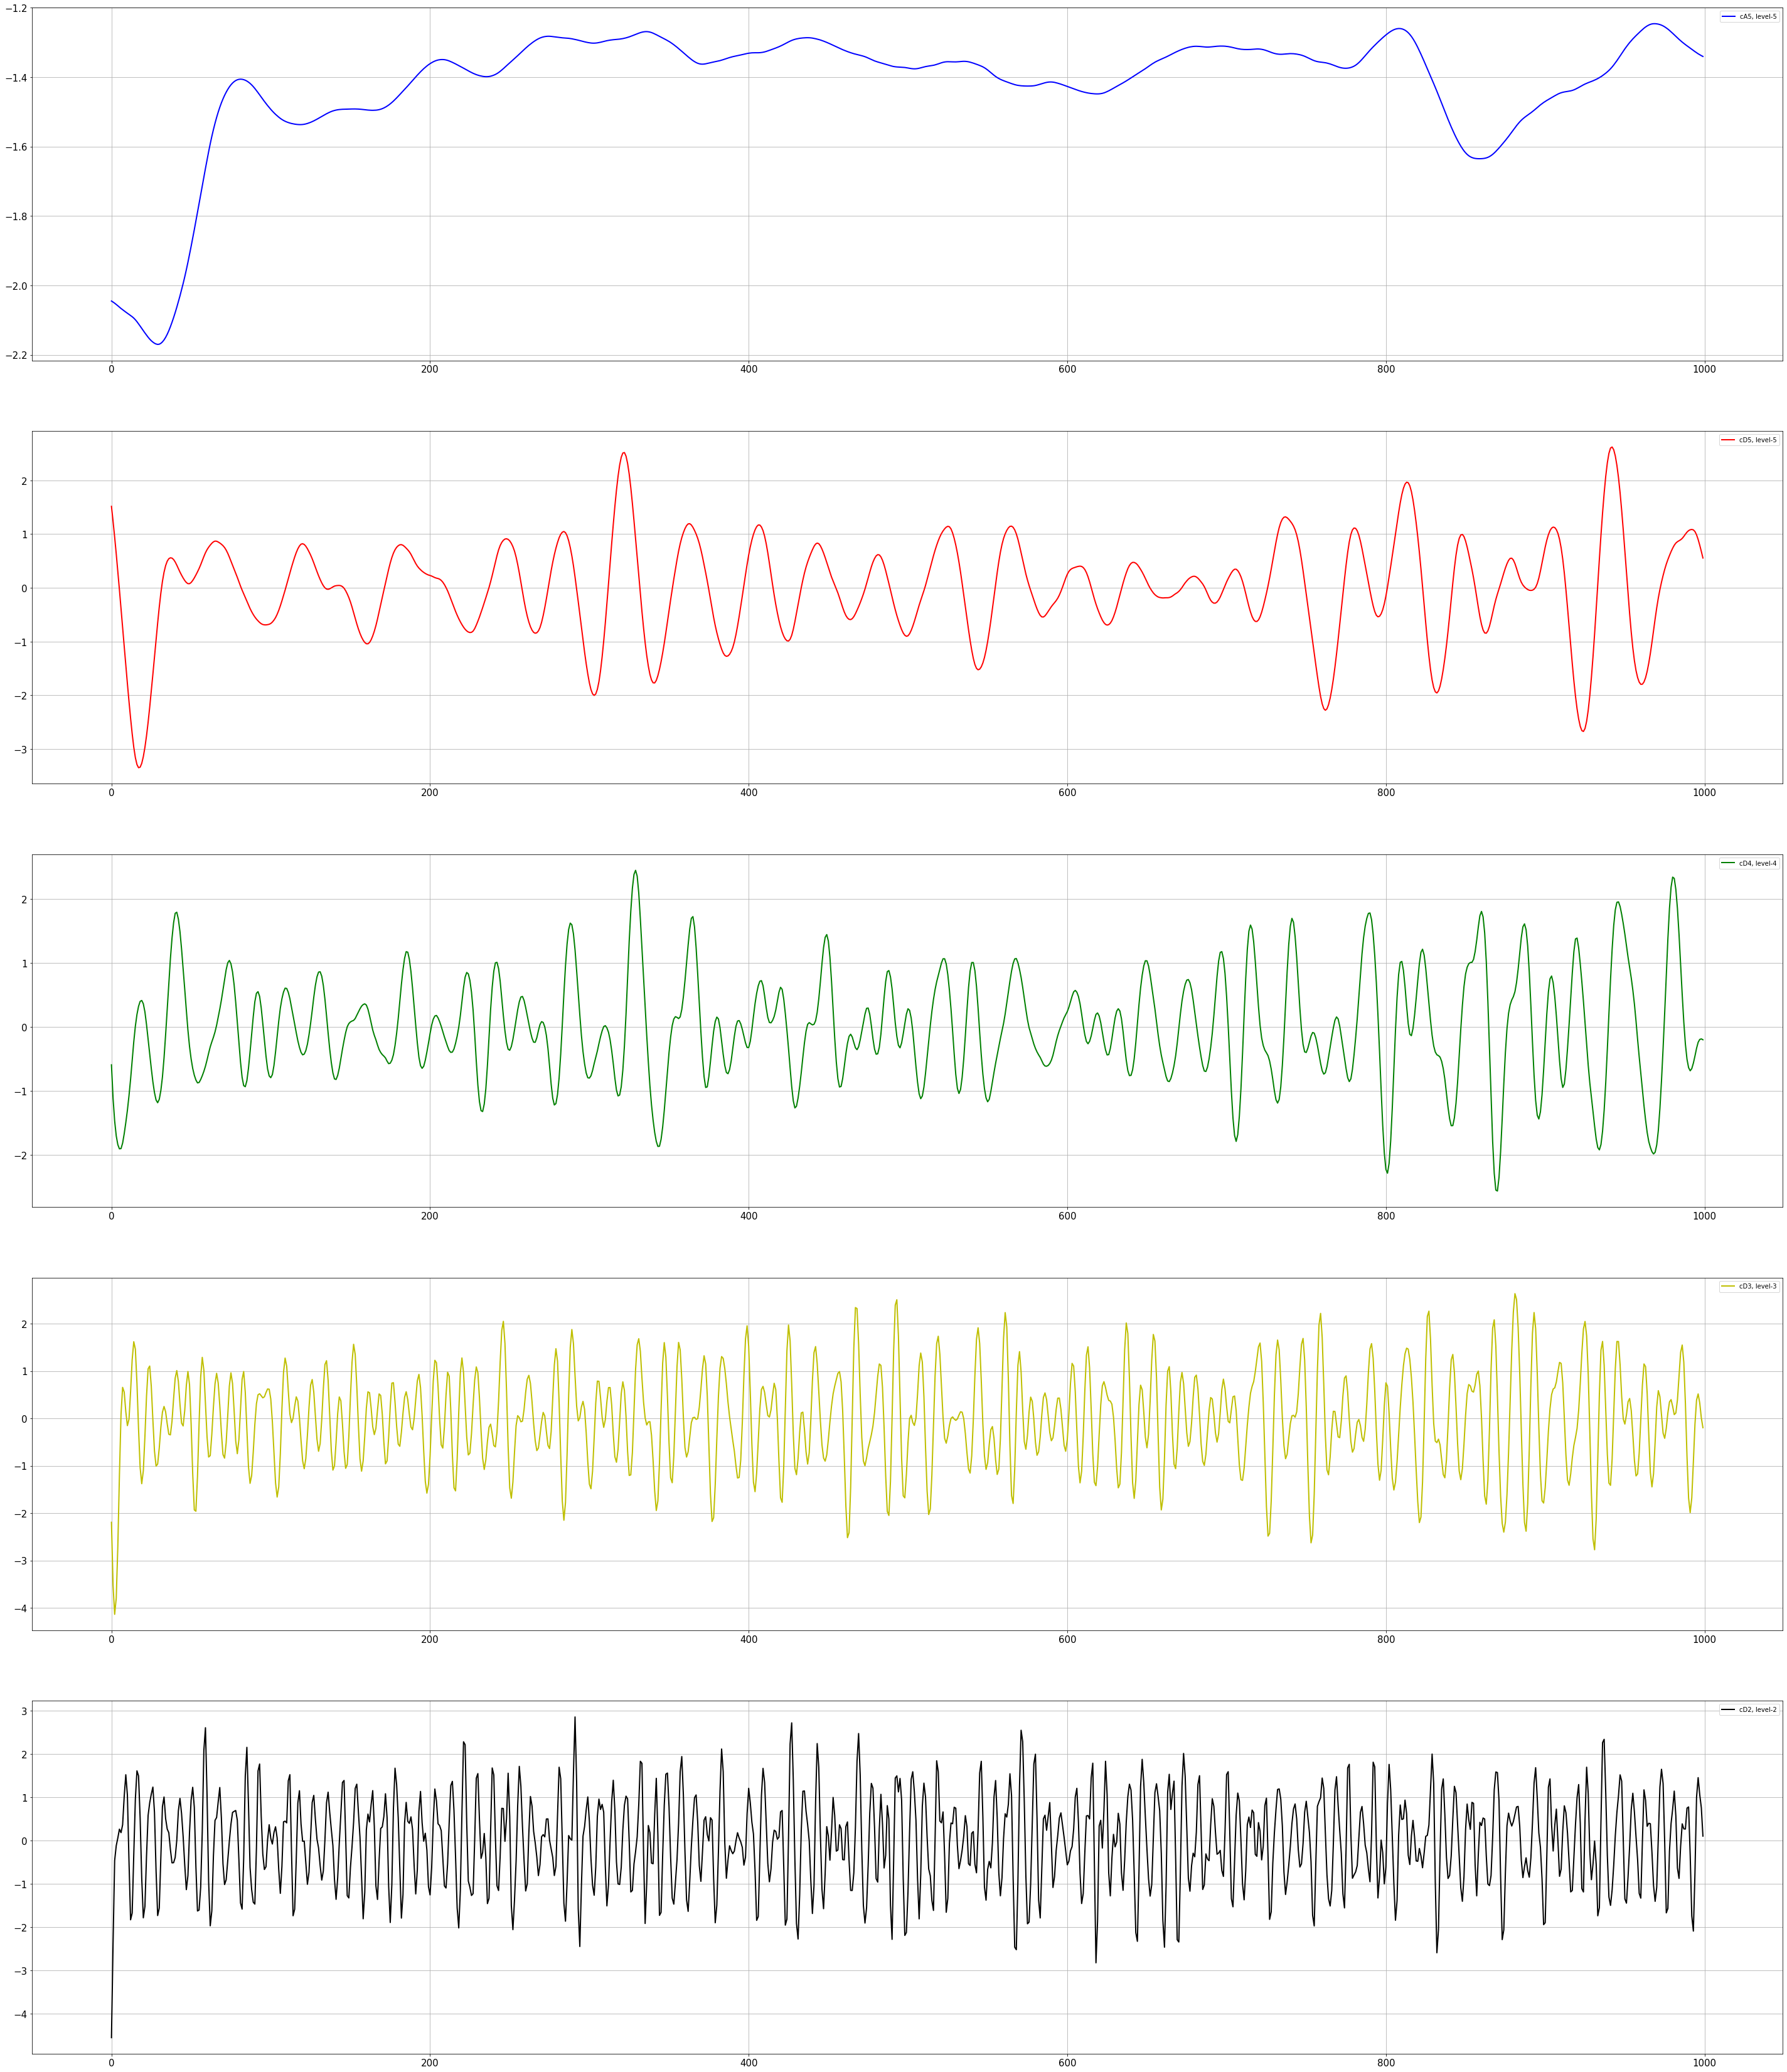

In [ ]:
# standardize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
stdA5 = ss.fit_transform(cA5.reshape(-1, 1))
stdD5 = ss.fit_transform(cD5.reshape(-1, 1))
stdD4 = ss.fit_transform(cD4.reshape(-1, 1))
stdD3 = ss.fit_transform(cD3.reshape(-1, 1))
stdD2 = ss.fit_transform(cD2.reshape(-1, 1))
stdD1 = ss.fit_transform(cD1.reshape(-1, 1))
stdSignal = [stdA5, stdD5, stdD4, stdD3, stdD2, stdD1]
colorE = ['b','r','g','y','k','m']
labeled = ['cA5, level-5','cD5, level-5','cD4, level-4','cD3, level-3','cD2, level-2','cD1, level-1']
fig, ax = plt.subplots(5, 1, figsize=(50, 60))
for i in range(5):
    for j in range(1):
       ax[i].plot(stdSignal[i][0:1000], colorE[i] ,linewidth = 2, label = labeled[i])
       ax[i].grid ()
       ax[i].legend (loc = 'best')

In [ ]:
#FDR shenanigans
result = []
for i in cd:
    mean_i = i.mean()
    std_i = i.std()
    result.append((mean_i, std_i))
FDRs = []
FDRs_name = []
for i in range (0, len(result)):
    for j in range (i, len(result)):
        if i != j:
            name = str(labeled[i][0:3]) + "-" + str(labeled[j][0:3])
            FDRs_name.append(name)
            FDR = (result[i][0] - result[j][0])/(result[i][1]**2-result[j][1]**2)
            FDRs.append(FDR)
FDRs_dict = dict(zip(FDRs_name, FDRs))


In [ ]:
#PCA shenanigans

N = len(standardized_train.index)
data_train_corr = 1/(N-1)* standardized_train.values.T @ standardized_train.values
eigenValues, eigenVectors = np.linalg.eig(data_train_corr)
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]
data_train_pca = pd.DataFrame()
data_test_pca = pd.DataFrame()
for i in range(eigenVectors.shape[1]):
    data_train_pca['PCA_cmp' + str(i + 1)] = eigenVectors[:, i] @ standardized_train.T
    data_test_pca['PCA_cmp' + str(i + 1)] = eigenVectors[:, i] @ standardized_train.T

NameError: ignored

In [ ]:
def explain_variance(orig_var, pca_var):
    orig_var_total = sum(orig_var)
    pca_var_total = sum(pca_var)

    # cumsum()
    orig_cum = np.cumsum(orig_var)
    pca_cum = np.cumsum(pca_var)

    # turn cumsum() to percentages
    orig_cum = [x / orig_var_total for x in orig_cum]
    pca_cum = [x / pca_var_total for x in pca_cum]
    
    for i in range(len(pca_cum)):
        print(f'Percentage covered by PCA with {i+1} dimension: {pca_cum[i]}')

    #print('Original var cumsum\n', orig_cum)
    #print('Var cumsum after pca\n', pca_cum)

    f, ax = plt.subplots()
    ax.plot(range(1, 1 + len(orig_cum)), orig_cum, '--bo', label='Original variance per column')
    ax.plot(range(1, 1 + len(pca_cum)), pca_cum, '-ro', label='PCA explained variance per component')
    plt.minorticks_on()
    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle=':')
    plt.show()    

In [ ]:
import pywt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Generalize Shenanigans:
plt.rcParams.update({'figure.figsize': (25,12)})
def run(filename):
    data_trains = []
    standardized_trains = []
    #import data
    data = bdfRecording(filename).getData().get('data')
    #seperate into different channels
    AF3 = data[1, :]#[0:10500]
    AF4 = data[28, :]#[0:10500]
    T7  = data[6, :]#[0:10500]
    T8  = data[23, :]#[0:10500]
    Pz  = data[12, :]#[0:10500]
    AF3_df = pd.DataFrame(data=AF3)
    AF4_df = pd.DataFrame(data=AF4)
    T7_df  = pd.DataFrame(data=T7)
    T8_df  = pd.DataFrame(data=T8)
    Pz_df  = pd.DataFrame(data=Pz)
    channels_name = ['AF3', 'AF4', 'T7', 'T8', 'Pz']
    channels = [AF3, AF4, T7, T8, Pz]
    channels_df = [AF3_df, AF4_df, T7_df, T8_df, Pz_df]
    channels_output = np.array([AF3, AF4, T7, T8, Pz])
    channels_output_df = pd.DataFrame(data = channels_output.transpose(), columns = channels_name).transpose()

    label = ['cA5','cD5','cD4','cD3','cD2','cD1']
    #feature extraction & perform standardization:

    for i in range (len(channels)):
        channel = channels[i]
        #Extraction
        coeffs = pywt.swt(channel, 'db4', level=5)
        [(cA5, cD5), (cA4, cD4), (cA3,cD3), (cA2, cD2), (cA1, cD1)] = coeffs
        cd = [cA5, cD5,cD4, cD3, cD2, cD1]

        #Standardize
        ss = StandardScaler()
        stdA5 = ss.fit_transform(cA5.reshape(-1, 1))
        stdD5 = ss.fit_transform(cD5.reshape(-1, 1))
        stdD4 = ss.fit_transform(cD4.reshape(-1, 1))
        stdD3 = ss.fit_transform(cD3.reshape(-1, 1))
        stdD2 = ss.fit_transform(cD2.reshape(-1, 1))
        stdD1 = ss.fit_transform(cD1.reshape(-1, 1))
        stdSignal = [stdA5, stdD5, stdD4, stdD3, stdD2, stdD1]

        #PCA
        temp_train = np.array([cA5,cD5,cD4, cD3, cD2, cD1])
        data_train = pd.DataFrame(data = temp_train.transpose(), columns = [channels_name[i] + " cA5" , channels_name[i] + " cD5" , channels_name[i] + " cD4" , channels_name[i] + " cD3" , channels_name[i] + " cD2" , channels_name[i] + " cD1" ])
        temp_standardized = np.array([stdA5.flatten(), stdD5.flatten(),stdD4.flatten(), stdD3.flatten(), stdD2.flatten(), stdD1.flatten()])
        standardized_train = pd.DataFrame(data=temp_standardized.transpose(), columns = [channels_name[i] + " stdA5" , channels_name[i] + " stdD5" , channels_name[i] + " stdD4" , channels_name[i] + " stdD3" , channels_name[i] + " stdD2" , channels_name[i] + " stdD1" ])
        data_trains.append(data_train)
        standardized_trains.append(standardized_train)

    return channels_output_df, pd.concat(data_trains, axis = 1).transpose(), pd.concat(standardized_trains, axis = 1).transpose()

result = run('sub-hc1_ses-hc_task-rest_eeg.bdf')
print(result[1])

FileNotFoundError: ignored

In [ ]:
data_train = result[1].transpose()
standardized_train = result[2].transpose()
##PCA shenanigans
N = len(standardized_train.index)
data_train_corr = 1/(N-1)* standardized_train.values.T @ standardized_train.values
eigenValues, eigenVectors = np.linalg.eig(data_train_corr)
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]
data_train_pca = pd.DataFrame()
data_test_pca = pd.DataFrame()
for i in range(eigenVectors.shape[1]):
    data_train_pca['PCA_cmp' + str(i + 1)] = eigenVectors[:, i] @ standardized_train.T
    data_test_pca['PCA_cmp' + str(i + 1)] = eigenVectors[:, i] @ standardized_train.T

# To compare variances, we have to normalize original data
data_train_norm = (data_train - data_train.min(axis=0))/(data_train.max(axis=0) - data_train.min(axis=0))

# Compute variances by column
orig_var = data_train_norm.var().tolist()
pca_var = data_train_pca.var().tolist()

explain_variance(orig_var, pca_var)
#data_train_pca.var()

In [ ]:
pt0 = run('sub-hc1_ses-hc_task-rest_eeg.bdf')
pt1 = run('sub-hc2_ses-hc_task-rest_eeg.bdf')
pt2 = run('sub-pd3_ses-off_task-rest_eeg.bdf')
pt3 = run('sub-hc4_ses-hc_task-rest_eeg.bdf')
pt4 = run('sub-pd5_ses-off_task-rest_eeg.bdf')
pt5 = run('sub-pd6_ses-off_task-rest_eeg.bdf')
pt6 = run('sub-hc7_ses-hc_task-rest_eeg.bdf')
pt7 = run('sub-hc8_ses-hc_task-rest_eeg.bdf')
pt8 = run('sub-pd9_ses-off_task-rest_eeg.bdf')
pt9 = run('sub-hc10_ses-hc_task-rest_eeg.bdf')
pt10 = run('sub-pd12_ses-off_task-rest_eeg.bdf')
pt11 = run('sub-pd11_ses-off_task-rest_eeg.bdf')
pt12 = run('sub-pd13_ses-off_task-rest_eeg.bdf')
pt13 = run('sub-pd14_ses-off_task-rest_eeg.bdf')
pt14 = run('sub-pd16_ses-off_task-rest_eeg.bdf')
pt15 = run('sub-pd17_ses-off_task-rest_eeg.bdf')
pt16 = run('sub-hc18_ses-hc_task-rest_eeg.bdf')
pt17 = run('sub-pd19_ses-off_task-rest_eeg.bdf')
pt18 = run('sub-hc20_ses-hc_task-rest_eeg.bdf')
pt19 = run('sub-hc21_ses-hc_task-rest_eeg.bdf')
pt20 = run('sub-pd22_ses-off_task-rest_eeg.bdf')
pt21 = run('sub-pd23_ses-off_task-rest_eeg.bdf')
pt22 = run('sub-hc24_ses-hc_task-rest_eeg.bdf')
pt23 = run('sub-hc25_ses-hc_task-rest_eeg.bdf')
pt24 = run('sub-pd26_ses-off_task-rest_eeg.bdf')
pt25 = run('sub-pd28_ses-off_task-rest_eeg.bdf')
pt26 = run('sub-hc29_ses-hc_task-rest_eeg.bdf')
pt27 = run('sub-hc30_ses-hc_task-rest_eeg.bdf')
pt28 = run('sub-hc31_ses-hc_task-rest_eeg.bdf')
pt29 = run('sub-hc32_ses-hc_task-rest_eeg.bdf')
pt30 = run('sub-hc33_ses-hc_task-rest_eeg.bdf')
ptlist = [pt0, pt1, pt2, pt3, pt4, pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16, pt17, pt18, pt19, pt20, pt21, pt22, pt23, pt24, pt25, pt26, pt27, pt28, pt29, pt30]

In [ ]:
AF3_cA5 = []
AF3_cD5 = []
AF3_cD4 = []
AF3_cD3 = []
AF3_cD2 = []
AF3_cD1 = []
AF4_cA5 = []
AF4_cD5 = []
AF4_cD4 = []
AF4_cD3 = []
AF4_cD2 = []
AF4_cD1 = []
T7_cA5 = []
T7_cD5 = []
T7_cD4 = []
T7_cD3 = []
T7_cD2 = []
T7_cD1 = []
T8_cA5 = []
T8_cD5 = []
T8_cD4 = []
T8_cD3 = []
T8_cD2 = []
T8_cD1 = []
Pz_cA5 = []
Pz_cD5 = []
Pz_cD4 = []
Pz_cD3 = []
Pz_cD2 = []
Pz_cD1 = []
columns = [AF3_cA5, AF3_cD5, AF3_cD4, AF3_cD3, AF3_cD2, AF3_cD1, AF4_cA5, AF4_cD5, AF4_cD4, AF4_cD3, AF4_cD2, AF4_cD1, T7_cA5, T7_cD5, T7_cD4, T7_cD3, T7_cD2, T7_cD1, T8_cA5, T8_cD5, T8_cD4, T8_cD3, T8_cD2, T8_cD1, Pz_cA5, Pz_cD5, Pz_cD4, Pz_cD3, Pz_cD2, Pz_cD1]

In [ ]:
for pt in ptlist:
    for i in range(30):
        temp = pt[2].iloc[i].to_numpy()[0:90000]
        columns[i].append(temp)
data = {'AF3_cA5' : AF3_cA5, 'AF3_cD5' : AF3_cD5, 'AF3_cD4' : AF3_cD4, 'AF3_cD3' : AF3_cD3, 'AF3_cD2' : AF3_cD2, 'AF3_cD1' : AF3_cD1, 'AF4_cA5' : AF4_cA5, 'AF4_cD5' : AF4_cD5, 'AF4_cD4' : AF4_cD4, 'AF4_cD3' : AF4_cD3, 'AF4_cD2' : AF4_cD2, 'AF4_cD1' : AF4_cD1, 'T7_cA5' : T7_cA5, 'T7_cD5' : T7_cD5, 'T7_cD4' : T7_cD4, 'T7_cD3' : T7_cD3, 'T7_cD2' : T7_cD2, 'T7_cD1' : T7_cD1, 'T8_cA5' : T8_cA5, 'T8_cD5' : T8_cD5, 'T8_cD4' : T8_cD4, 'T8_cD3' : T8_cD3, 'T8_cD2' : T8_cD2, 'T8_cD1' : T8_cD1, 'Pz_cA5' : Pz_cA5, 'Pz_cD5' : Pz_cD5, 'Pz_cD4' : Pz_cD4, 'Pz_cD3' : Pz_cD3, 'Pz_cD2' : Pz_cD2, 'Pz_cD1' : Pz_cD1}
data_train = pd.DataFrame(data)

In [ ]:
#run('sub-pd3_ses-off_task-rest_eeg.bdf')

In [ ]:
#run('sub-pd3_ses-on_task-rest_eeg.bdf')

In [ ]:
data_train_labels = pd.read_csv('participants.tsv', sep = '\t')
#data_train_full = data_train + data_train_labels\
data_train_labels.drop(data_train_labels.columns[[1, 2, 3]], axis=1, inplace=True)
temp = []
for i in data_train_labels['disease_duration']:
    if i != 0 and str(i) != 'nan':
        temp.append(1)
    else:
        temp.append(0)
data_train_labels['Has Parkinson'] = temp
data_train_labels

In [ ]:
data_train = data_train.head(20)
data_train_labels = data_train_labels.head(20)
data_test = data_train.tail(10)
data_test_labels = data_train_labels.tail(10)

In [ ]:
from sklearn import neighbors
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error

for column in columns:
    X = pd.DataFrame(data = column)
    X_train = X.head(20)
    X_test = X.tail(10)
    Knn = neighbors.KNeighborsRegressor()
    Knn.fit(X_train, data_train_labels['Has Parkinson'])  
    error = sqrt(metrics.mean_squared_error(data_test_labels['Has Parkinson'], Knn.predict(X_test))) 
    print('RMSE value of the KNN Model is:', error)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train.to_numpy().T.flatten(), data_train_labels['Has Parkinson'])
    pred_i = knn.predict(data_test)
    error.append(np.mean(pred_i != data_test_labels['Has Parkinson']))

m = min(error)
min_ind = error.index(m)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
    markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

nof_neighbors = min_ind + 1
print("The method 'knn_optimize' found that " +
          "the mean error reaches the minimum when the number of neighbors K is", nof_neighbors)
knn = KNeighborsClassifier(n_neighbors=nof_neighbors)
knn.fit(data_train, data_train_labels['Has Parkinson'])
pred_i = knn.predict(data_test)
print(classification_report(data_test_labels['Has Parkinson'], pred_i))
print("Confusion matrix: ")
print(confusion_matrix(data_test_labels['Has Parkinson'], pred_i))
sns.heatmap(confusion_matrix(data_test_labels['Has Parkinson'], pred_i), annot = True)
plt.show()

In [ ]:
## SVM

from sklearn import svm

for column in columns:
    X = pd.DataFrame(data = column)
    X_train = X.head(20)
    x_test = X.tail(10)
    Svm = svm.SVC()
    Svm.fit()